# Análise Base de Dados

In [16]:
pip install xlrd
pip install geopy
pip install geopyimport pandas as pd

In [17]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
dados = pd.read_excel('/content/Mapa.xls')

In [19]:
dadosSemFic = dados[dados['Modalidade']!='FIC']

In [20]:
dadosSemFic['Naturalidade'].value_counts()

Sertãozinho-SP           2927
Ribeirão Preto-SP        1067
Pontal-SP                 350
São Paulo-SP              324
-                         167
                         ... 
Ipiranga do Piaui-PI        1
Caconde-SP                  1
Iracemapolis-SP             1
Axixa do Tocantins-TO       1
Bom Conselho-PE             1
Name: Naturalidade, Length: 685, dtype: int64

# TRABALHANDO COM CIDADES E NATURALIDADE (SEM CURSOS FIC)

**Criando um loop para montar 2 dataframes isolados. Um para cursos regulares e um para FIC**

### Testando a biblioteca

In [14]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")
endereco = f"{'Sertãozinho'}, {'São Paulo'}, {'Brasil'}"
localizacaoSrt = geolocator.geocode(endereco)
geolocator = Nominatim(user_agent="my_app")
endereco = f"{'Ribeirão Preto'}, {'São Paulo'}, {'Brasil'}"
localizacaoRib = geolocator.geocode(endereco)


### Ajustando os dados corrompidos

In [30]:
hashCidadeLocalizacao = {}
geolocator = Nominatim(user_agent="my_app")

In [32]:
from geopy.geocoders import Nominatim
import socket
import ssl

def obter_coordenadas(cidade, estado, pais):
  if cidade == "Franca":
    return -20.5418, -47.4197
  if cidade == "Nao-Me-Toque" or cidade == "NaoNaNMeNaNToque":
    return -28.4579, -52.822
  if cidade == "TomeNaNAcu":
    return -28.1111, -52.111
  if cidade == "JiNaNParana":
    return -10.8808, -61.9419
  if cidade == "IgarapeNaNAcu":
    return -1.1279, -47.6156
  if cidade == "Colombia":
    return -20.1807, -48.6889
  if cidade == "Guadalupe":
    return -6.78762, -43.5663
  if cidade == "Rio Grande":
    return -32.0332, -52.0986
  if cidade == "Itapage":
    return -3.691, -39.5802

  try:
      if cidade in hashCidadeLocalizacao:
        localizacao = hashCidadeLocalizacao[cidade]
      else:
        endereco = f"{cidade}, {estado}, {pais}"
        print("CIDADE: " + cidade + " ESTADO: " + estado)
        localizacao = geolocator.geocode(endereco)
        if localizacao is not None:
          hashCidadeLocalizacao[cidade] = localizacao

      latitude = localizacao.latitude
      longitude = localizacao.longitude
      return latitude, longitude
  except socket.timeout:
      print("Ocorreu um SocketTimeout.")
      return 0, 0
  except ssl.SSLError as e:
      print("Ocorreu um BaseSSLError:", str(e))
      return 0, 0
  except socket.error as e:
      print("Ocorreu um SocketError:", str(e))
      return 0, 0

In [ ]:
i = 0
dadosNovos = pd.DataFrame(columns=['CidadeNaturalidade', 'EstadoNaturalidade','Modalidade','Latitude','Longitude'])
countNull = 0

for index, row in dados.iterrows():
  valor = row['Naturalidade']
  if pd.isnull(valor):
    countNull = countNull+1
  else:
    cidade = valor[:-3]
    estado = valor[-2:]
    if row['Modalidade'] != "FIC":
      dadosNovos.loc[i,'CidadeNaturalidade'] = cidade
      dadosNovos.loc[i,'EstadoNaturalidade'] = estado
      dadosNovos.loc[i,'Modalidade'] =row['Modalidade']
      coordenadas = obter_coordenadas(cidade, estado, 'Brasil')
      if coordenadas is not None:
          latitude, longitude = coordenadas
          dadosNovos.loc[i,'Latitude'] = latitude
          dadosNovos.loc[i,'Longitude'] = longitude
      else:
          print("ERRO PEGANDO COOREDENADA DE " + cidade)
      i=i+1


CIDADE: Jacuipe ESTADO: AL
CIDADE: Senador Firmino ESTADO: MG
CIDADE: Teixeira de Freitas ESTADO: BA
CIDADE: Cachoeiro de Itapemirim ESTADO: ES
CIDADE: Itapira ESTADO: SP
CIDADE: Pratapolis ESTADO: MG
CIDADE: Jacobina ESTADO: BA
CIDADE: Senhor do Bonfim ESTADO: BA
CIDADE: Conceicao do Coite ESTADO: BA
CIDADE: Tres Pontas ESTADO: MG
CIDADE: Alto Rio Doce ESTADO: MG
CIDADE: Tuparetama ESTADO: PE
CIDADE: Benjamin Constant ESTADO: AM
CIDADE: Miracema do Tocantins ESTADO: TO
CIDADE: Catole do Rocha ESTADO: PB
CIDADE: Batalha ESTADO: AL
CIDADE: Caxias ESTADO: MA
CIDADE: Resende ESTADO: RJ
CIDADE: Ananindeua ESTADO: PA
CIDADE: Lauro de Freitas ESTADO: BA
CIDADE: Joao Camara ESTADO: RN
CIDADE: Aimores ESTADO: MG
CIDADE: Muqui ESTADO: ES
CIDADE: Gurupi ESTADO: TO
CIDADE: Monte Azul ESTADO: MG
CIDADE: Vespasiano ESTADO: MG
CIDADE: Nova Lima ESTADO: MG
CIDADE: Jaguariúna ESTADO: SP
CIDADE: Itabuna ESTADO: BA
CIDADE: Adamantina ESTADO: SP
CIDADE: Ribeirao Cascalheira ESTADO: MT
CIDADE: Areado ESTA

CIDADE: Miracema ESTADO: RJ
CIDADE: Taua ESTADO: CE
CIDADE: Mombaca ESTADO: CE
CIDADE: Sao Benedito ESTADO: CE
CIDADE: Itacoatiara ESTADO: AM
CIDADE: Alto Longa ESTADO: PI
CIDADE: Uruburetama ESTADO: CE
CIDADE: Jandira ESTADO: SP
CIDADE: Pires do Rio ESTADO: GO
CIDADE: Coreau ESTADO: CE
CIDADE: Ibiassuce ESTADO: BA
CIDADE: Iracema ESTADO: CE
CIDADE: Caucaia ESTADO: CE
CIDADE: Sao Joao do Piaui ESTADO: PI
CIDADE: Cruzeiro do Sul ESTADO: AC
CIDADE: Ubajara ESTADO: CE
CIDADE: Uniao ESTADO: PI
CIDADE: Varzea Grande ESTADO: MT
CIDADE: Alexandria ESTADO: RN
CIDADE: Carazinho ESTADO: RS
CIDADE: Muriae ESTADO: MG
CIDADE: Itapemirim ESTADO: ES
CIDADE: Joao Neiva ESTADO: ES
CIDADE: Junqueiro ESTADO: AL
CIDADE: Piripiri ESTADO: PI
CIDADE: Nova Erechim ESTADO: SC
CIDADE: Tupaciguara ESTADO: MG
CIDADE: Mata de Sao Joao ESTADO: BA
CIDADE: Nova Friburgo ESTADO: RJ
CIDADE: Sao Joao de Meriti ESTADO: RJ
CIDADE: Santa Luzia ESTADO: MG
CIDADE: Crato ESTADO: CE
CIDADE: Nova Prata ESTADO: RS
CIDADE: Caraub

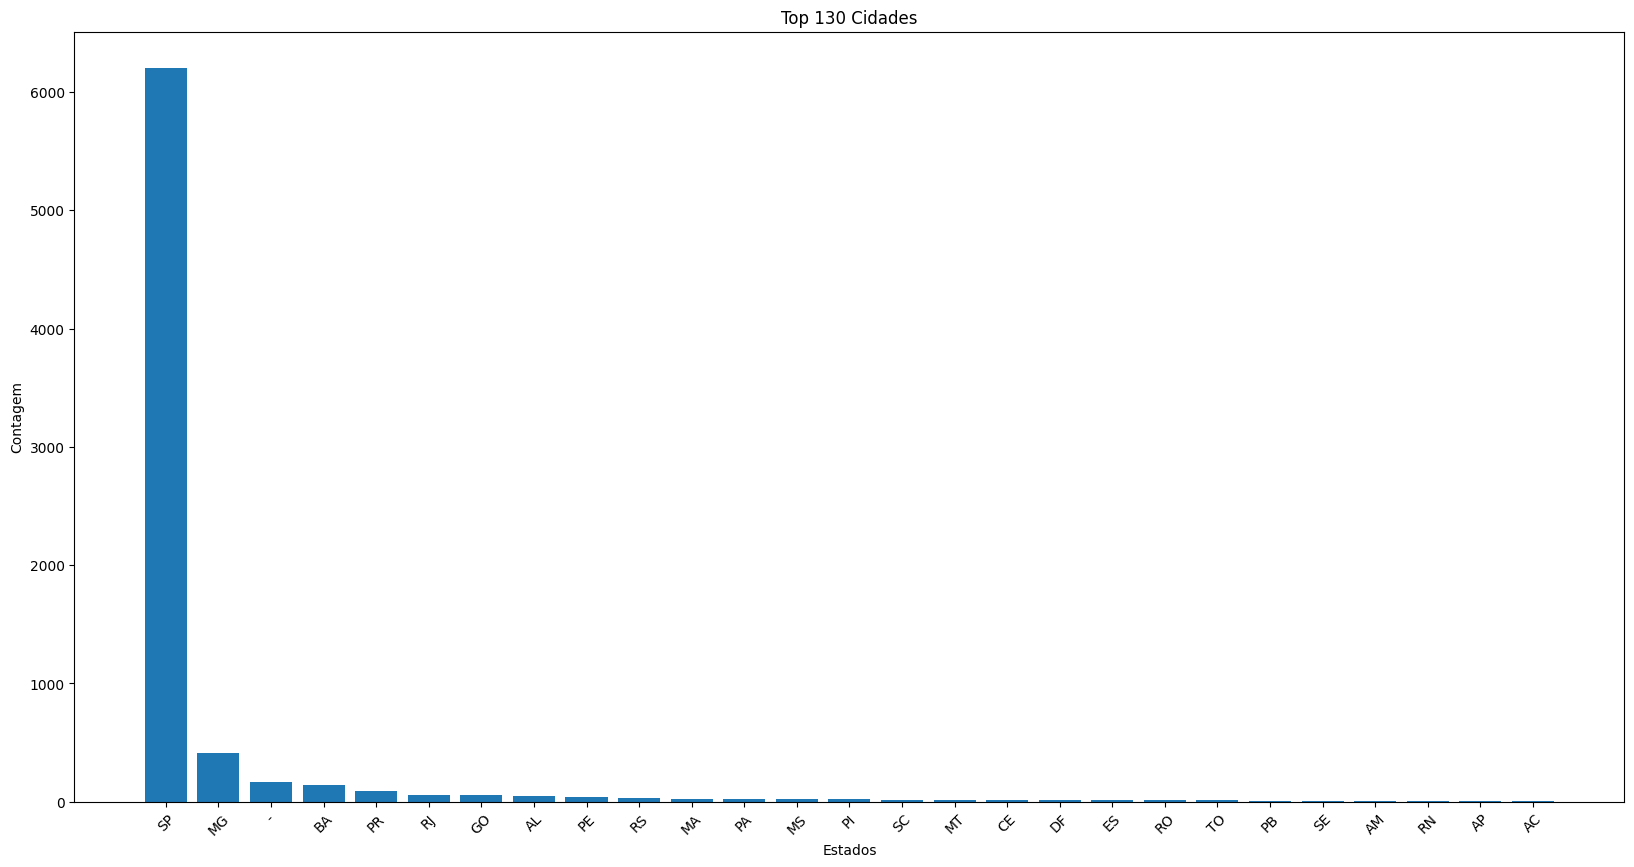

In [37]:
contagem_estados = dadosNovos['EstadoNaturalidade'].value_counts()

plt.figure(figsize=(20, 10))
plt.bar(contagem_estados.index, contagem_estados.values)
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.title('Top 130 Cidades')
plt.xticks(rotation=45)

plt.show()

### Analisando as 30 cidades mais presentes no câmpus.

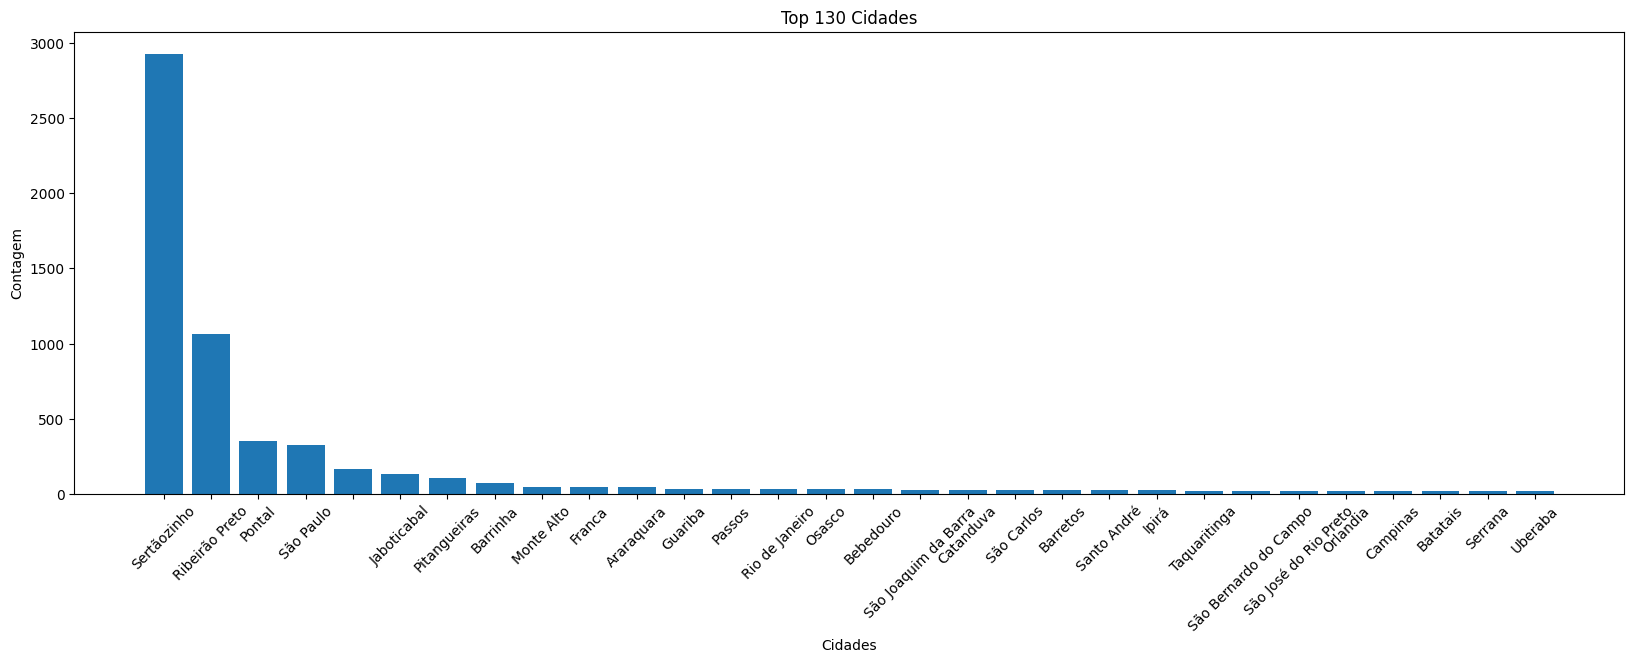

In [38]:
contagem_cidades = dadosNovos['CidadeNaturalidade'].value_counts()
top_30_cidades = contagem_cidades.head(30)
plt.figure(figsize=(20, 6))
plt.bar(top_30_cidades.index, top_30_cidades.values)
plt.xlabel('Cidades')
plt.ylabel('Contagem')
plt.title('Top 130 Cidades')
plt.xticks(rotation=45)

plt.show()

In [39]:
top_30_cidades

Sertãozinho              2927
Ribeirão Preto           1067
Pontal                    350
São Paulo                 324
                          167
Jaboticabal               131
Pitangueiras              107
Barrinha                   74
Monte Alto                 48
Franca                     48
Araraquara                 44
Guariba                    35
Passos                     34
Rio de Janeiro             33
Osasco                     30
Bebedouro                  30
São Joaquim da Barra       26
Catanduva                  26
São Carlos                 25
Barretos                   25
Santo André                25
Ipirá                      24
Taquaritinga               23
São Bernardo do Campo      22
São José do Rio Preto      22
Orlandia                   21
Campinas                   21
Batatais                   21
Serrana                    21
Uberaba                    19
Name: CidadeNaturalidade, dtype: int64

### Analisando de um curso específico

## Analisando somente cursos FIC

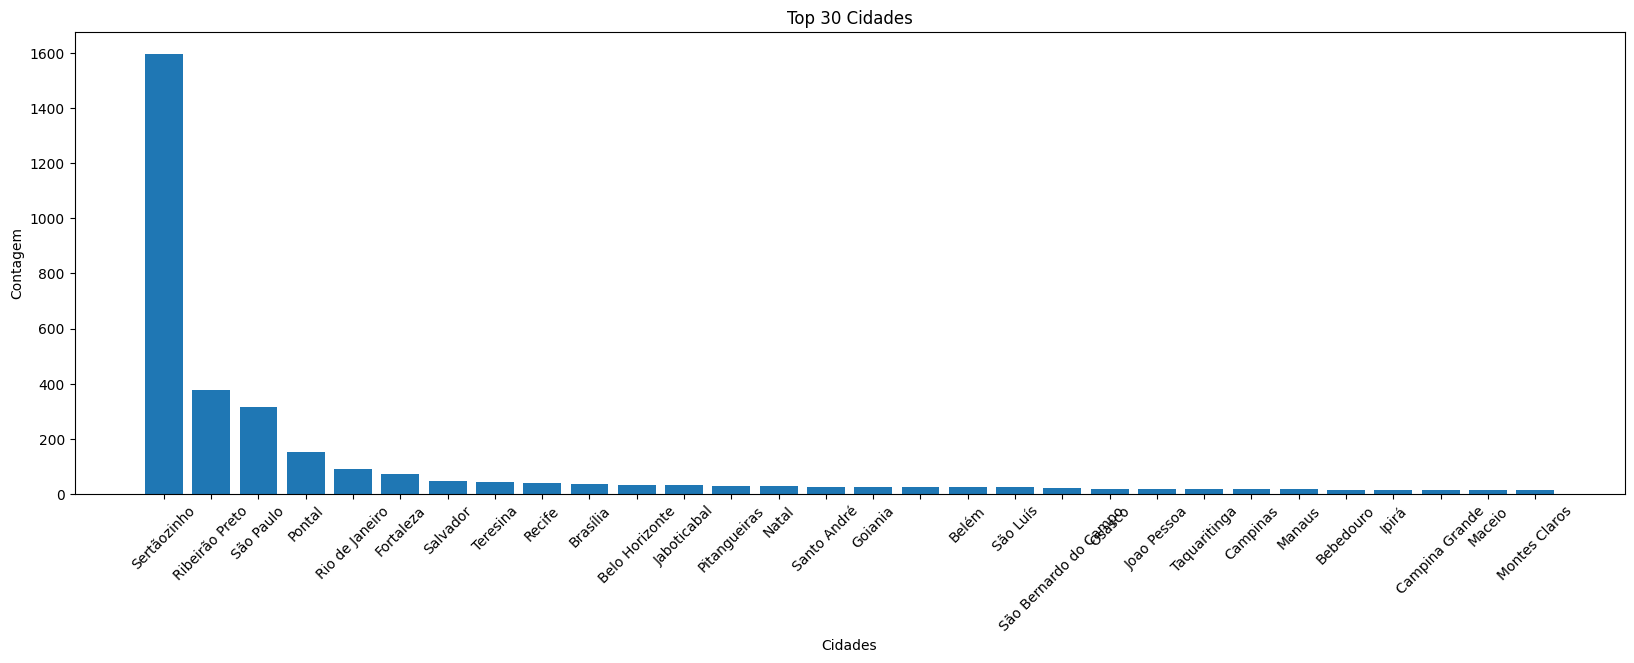

In [41]:
dados_filtrados_fic = dadosNovosFic.loc[dadosNovosFic['Modalidade'] == "FIC"]
contagem_cidades = dados_filtrados_fic['CidadeNaturalidade'].value_counts()
top_30_cidades = contagem_cidades.head(30)
plt.figure(figsize=(20, 6))
plt.bar(top_30_cidades.index, top_30_cidades.values)
plt.xlabel('Cidades')
plt.ylabel('Contagem')
plt.title('Top 30 Cidades')
plt.xticks(rotation=45)

plt.show()



## MAPA INTERATIVO

In [46]:
pip install geopandas


In [47]:
pip install shapely


In [51]:
pip install --upgrade geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.7.0
    Uninstalling geopandas-0.7.0:
      Successfully uninstalled geopandas-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geobr 0.2.0 requires geopandas<0.8.0,>=0.7.0, but you have geopandas 0.14.0 which is incompatible.


In [50]:

pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.4 MB/s eta 0:00:00


In [49]:
pip install geobr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [52]:
import folium
import pandas as pd
import json
from numpy import median
from osgeo import ogr
import geopandas as gpd
from shapely.geometry import Point

localizacao = hashCidadeLocalizacao["Sertãozinho"]
middle_lat = localizacao.latitude
middle_lon = localizacao.longitude

testmap = folium.Map(location=[middle_lat, middle_lon], zoom_start=9,tiles="cartodb positron")

ocorrencias = dadosNovos['CidadeNaturalidade'].value_counts()
df = pd.DataFrame(columns=['lat', 'lon', 'rad'])

i=0
for cidade, localizacao in hashCidadeLocalizacao.items():
    radius = 500
    color = '#000'
    try:
      radius = ocorrencias[cidade]
      if radius>2000:
        color = '#FF0000'
        radius = 10000
      elif radius>1000:
        color = '#FFA500'
        radius = 7000
      elif radius>700:
        color = '#FFA500'
        radius = 5000
      elif radius>500:
        color = '#FFA500'
        radius = 4000
      elif radius>300:
        color = '#FFA500'
        radius = 2000
      elif radius>200:
        color = '#FFA500'
        radius = 1500
      elif radius>100:
        color = '#FFA500'
        radius = 1000
      elif radius>50:
        color = '#0000FF'
        radius = 500
      else:
        color = '#000000'
        radius = 200




    except KeyError as err:
      radius = 1
    except TypeError:
      radius = 1

    poputText = cidade + "\nN°: " + str(ocorrencias[cidade])
    folium.Circle(location=[localizacao.latitude, localizacao.longitude], popup=poputText, fill_color=color, radius=radius, weight=2, color=color).add_to(testmap)
    df.loc[i] = [localizacao.latitude, localizacao.longitude, radius]
    i=i+1
    print("Chave:" + cidade + " ValorLat: " + str(localizacao.latitude) + " ValorLong: " + str(localizacao.longitude))

import random

def random_html_color():
    r = random.randint(0,256)
    g = random.randint(0,256)
    b = random.randint(0,256)
    return '#%02x%02x%02x' % (r, g, b)

def style_fcn(x):
    return { 'fillColor': random_html_color() }

def highlight_fcn(x):
    return { 'fillColor': '#ff0000' }

df['geom'] = df.apply(lambda r: Point(r['lon'], r['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geom', crs='epsg:4326')
gdf_flat = gdf.to_crs('epsg:6347')
gdf_flat['geom'] = gdf_flat.geometry.buffer(df.rad)
gdf = gdf_flat.to_crs('epsg:4326')
gdf.to_file('data.geojson', driver='GeoJSON')


testmap.save('testing_map.html')

Chave:Osasco ValorLat: -23.5324859 ValorLong: -46.7916801
Chave:Sertãozinho ValorLat: -21.1375782 ValorLong: -47.9913741
Chave:Ribeirão Preto ValorLat: -21.1776315 ValorLong: -47.8100983
Chave: ValorLat: -10.3333333 ValorLong: -53.2
Chave:Paulista ValorLat: -7.9340069 ValorLong: -34.868407
Chave:Pontal ValorLat: -21.0239714 ValorLong: -48.0393457
Chave:Jampruca ValorLat: -18.4613981 ValorLong: -41.8092299
Chave:Morro do Chapeu ValorLat: -11.5500293 ValorLong: -41.1570248
Chave:Água Preta ValorLat: -8.7079109 ValorLong: -35.5198586
Chave:Araçatuba ValorLat: -21.207992 ValorLong: -50.4390225
Chave:Catanduva ValorLat: -21.1331035 ValorLong: -48.9712817
Chave:Pindai ValorLat: -14.4911899 ValorLong: -42.6864686
Chave:Rio Real ValorLat: -11.4869788 ValorLong: -37.9317491
Chave:Contagem ValorLat: -19.9132749 ValorLong: -44.0840953
Chave:Condeuba ValorLat: -14.902227 ValorLong: -41.971829
Chave:Santa Leopoldina ValorLat: -20.0987046 ValorLong: -40.5269434
Chave:Grandes Rios ValorLat: -24.14546

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
